+
You're ready to put into practice everything you've learned so far.

DONE
First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.


Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

A specified research question your model addresses
How you chose your model specification and what alternatives you compared it to
The practical uses of your model for an audience of interest
Any weak points or shortcomings of your model
This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of your work in the last two supervised learning units. As a secondary matter, your slides and / or the Jupyter notebook you use or adapt them into should be worthy of inclusion as examples of your work product when applying to jobs.

to-do list

1) load data                        DONE

2) clean dataset                 unnecessary columns are dropped, NaN values are dropped,

3) feature engineering:          
                                 each columns are independent. if inter-dependent, drop the additional one
                                 each column values are converted to numeric
                                 new columns are added if needed
                                 
                                 
                                 
4) models:                       decision tree
                                 random forest
                                 SVC
                                 


## Research Questions

    Based upon data, can the model predict whether one loan will default or not?



In [30]:
import numpy as np
import pandas as pd
import scipy
import math
from decimal import Decimal
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# decision tree
from sklearn import tree
# A convenience for displaying visualizations.
from IPython.display import Image
# Packages for rendering our tree.
import pydotplus
#import graphviz

# linear regression model
from sklearn import linear_model

# SVC
from sklearn import ensemble
from sklearn.svm import SVC

## Setup utility functions 

In [31]:
# convert alphabetic grades to numerical ones
#      A    B    C    D    E    F    G
#      1    2    3    4    5    6    7
def grade_from_alphabet_to_numeric(x):
    grade_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
    try:
        return grade_map[str(x)]
    except KeyError:
        return Decimal('nan')

In [32]:
# convert string emp_length to numerical ones
#  
def convert_emp_length_to_numeric(x):
    x_tmp = str(x).split(' ')[:-1]
    x_new = str(x_tmp[0])
    if len(x_tmp) > 1:
        x_new = x_new + ' ' + x_tmp[1]
    
    conv_map = {'<1':0, '1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '10+':11}
    try:
        return conv_map[str(x_new)]
    except:
        return Decimal('nan')

In [33]:
# convert string home_ownership to numerical ones
#       'OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE'
#        1      2           3      4        5  
def convert_home_ownership_to_numeric(x):
    conv_map = {'OWN':1, 'MORTGAGE':2, 'RENT':3, 'OTHER':4, 'NONE':5}
    try:
        return conv_map[str(x)]
    except:
        return Decimal('nan')

In [34]:
# split dataset into train & test
def train_test_dataset(x, size, ran):
    x_train, x_test = train_test_split(x, test_size=size, random_state=ran)
    return x_train, x_test

## readin dataset

In [35]:
df = pd.read_csv('../../data-201-resources-master\LendingClub/LoanStats3a.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning dataset:    
            (1) drop unnecessary columns    
            (2) drop NaN values
            (3) convert remaining columns to numeric for models

In [36]:
# Below are the columns important for this analysis
X = pd.DataFrame()
X['loan_amnt'] = df['loan_amnt']
#X['funded_amnt_inv'] = df['funded_amnt_inv']
X['term'] = df['term']
X['int_rate'] = df['int_rate']
X['installment'] = df['installment']
X['grade'] = df['grade']
X['sub_grade'] = df['sub_grade']
X['emp_length'] = df['emp_length']
X['home_ownership'] = df['home_ownership']
X['annual_inc'] = df['annual_inc']
#X['verification_status'] = df['verification_status']
#X['purpose'] = df['purpose']
X['inq_last_6mths'] = df['inq_last_6mths']
X['loan_status'] = df['loan_status']

X = X.dropna()

In [37]:
# verify if there are NaN remaining
X.isnull().sum()

loan_amnt         0
term              0
int_rate          0
installment       0
grade             0
sub_grade         0
emp_length        0
home_ownership    0
annual_inc        0
inq_last_6mths    0
loan_status       0
dtype: int64

In [38]:
# convert column value to numeric
# strip off 'months'
X['term'] = X['term'].apply(lambda x: int(str(x)[:-7]))
# strip off '%'
X['int_rate'] = X['int_rate'].apply(lambda x: float(str(x)[:-1]))
X['grade'] = X['grade'].apply(lambda x: grade_from_alphabet_to_numeric(x))
# strip grade alphabet from subgrade
X['sub_grade'] = X['sub_grade'].apply(lambda x: int(str(x)[1:]))
X['emp_length'] = X['emp_length'].apply(lambda x: convert_emp_length_to_numeric(x))
X['home_ownership'] = X['home_ownership'].apply(lambda x: convert_home_ownership_to_numeric(x))

# target data
Y = pd.DataFrame()
Y['loan_status'] = X['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

X = X.drop(['loan_status'], axis=1)

## Performing Features' Selection

In [39]:
# if any feature has too small variance
selection = VarianceThreshold(threshold=(0.9*(1-0.9)))
X_tmp = selection.fit_transform(X)
print(X.shape)
print(X_tmp.shape)

(38708, 10)
(38708, 10)


##   visualizing data

## building models

In [40]:
# build train & test dataset
trainSize = int(0.70*(X.shape[0]))
X_train, X_test = train_test_dataset(X, trainSize, 1574)
Y_train, Y_test = train_test_dataset(Y, trainSize, 2916)

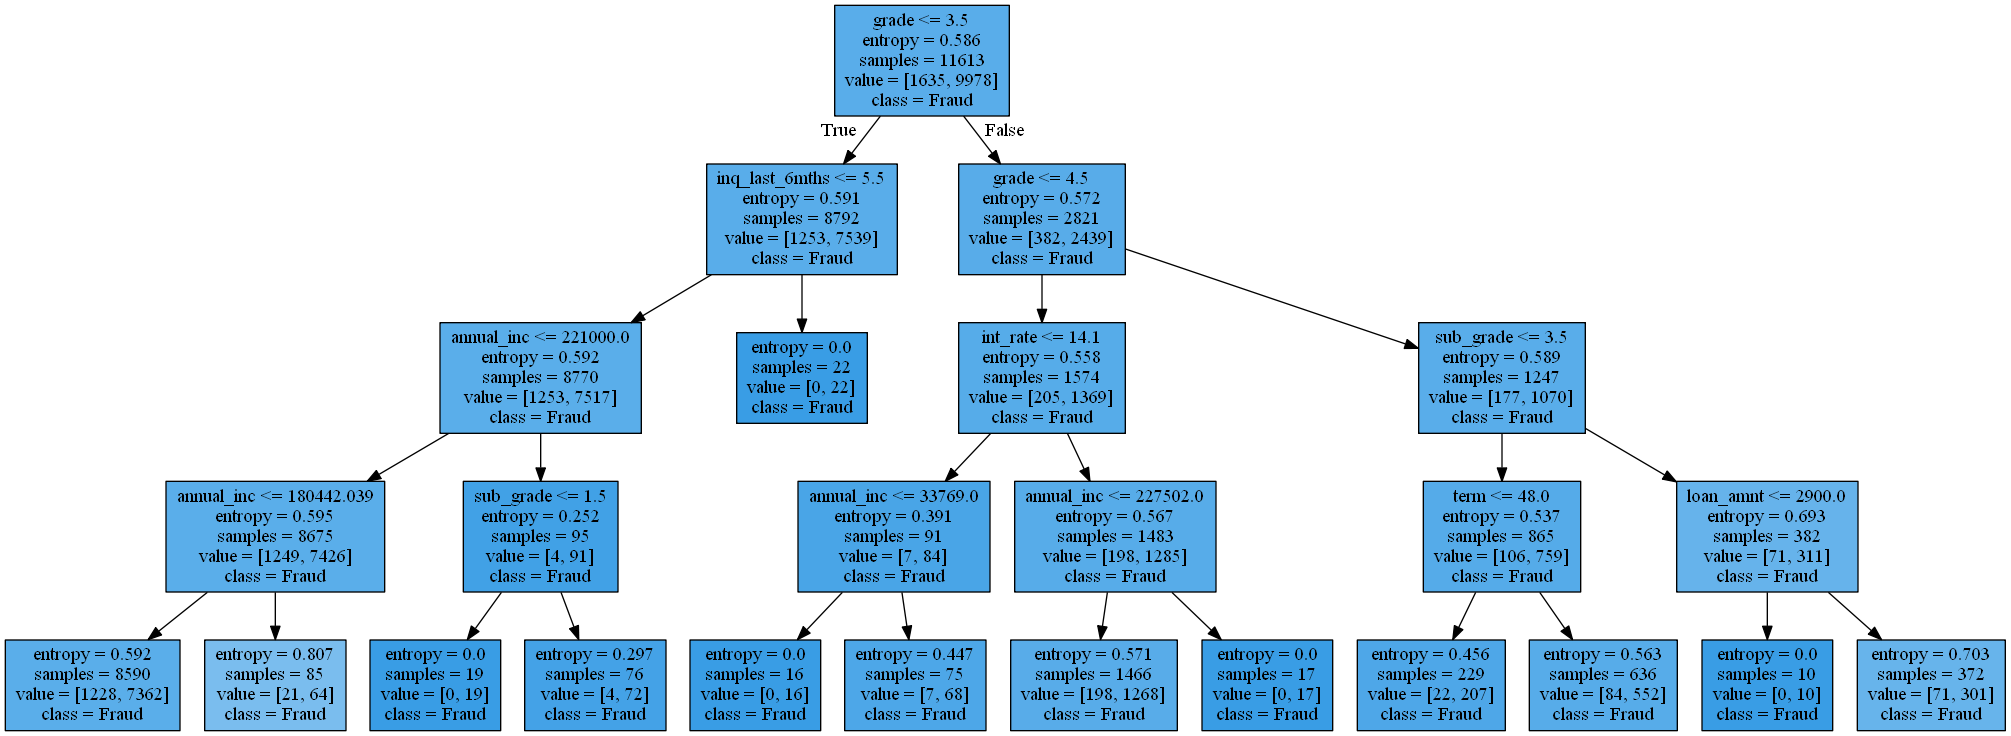

In [41]:
# use decision tree model
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, Y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=['Not Fraud', 'Fraud'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [42]:
print('Train dataset decision tree score = {}'.format(decision_tree.score(X_train, Y_train)))
print('Test dataset decision tree score = {}'.format(decision_tree.score(X_test, Y_test)))

Train dataset decision tree score = 0.8592095065874451
Test dataset decision tree score = 0.8595681860121793


In [43]:
cross_val_score(decision_tree, X_train, Y_train, cv=5)

array([0.85923375, 0.85923375, 0.85923375, 0.85917313, 0.85917313])

In [48]:
out_mat = confusion_matrix(Y_train, decision_tree.predict(X_train))
print('accuracy = {}'.format((out_mat[1, 1] / (out_mat[1, 1] + out_mat[1, 0]))))
print('typeI error = {}'.format((out_mat[1, 0] / (out_mat[1, 1] + out_mat[1, 0]))))
print('typeII error = {}'.format((out_mat[0, 1] / (out_mat[1, 1] + out_mat[1, 0]))))
print('specificity = {}'.format((out_mat[0, 0] / (out_mat[1, 1] + out_mat[1, 0]))))

accuracy = 1.0
typeI error = 0.0
typeII error = 0.16386049308478653
specificity = 0.0


In [49]:
# use Random Forest model
rfc = ensemble.RandomForestClassifier()

X_train = pd.get_dummies(X_train)
rfc.fit(X_train, Y_train)
cross_val_score(rfc, X_train, Y_train, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estima

array([0.8329746 , 0.83814034, 0.83125269, 0.83850129, 0.83677864])

In [50]:
print(rfc.score(X_train, Y_train))

0.9905278567123051


In [53]:
out_matrix = confusion_matrix(Y_train, rfc.predict(X_train))
print('accuracy = {}'.format((out_matrix[0, 0] / (out_matrix[0, 0] + out_matrix[0, 1]))))
print('typeI error = {}'.format((out_matrix[0, 1] / (out_matrix[0, 0] + out_matrix[0, 1]))))
print('typeII error = {}'.format((out_matrix[1, 0] / (out_matrix[0, 0] + out_matrix[0, 1]))))
print('specificity = {}'.format((out_matrix[1, 1] / (out_matrix[0, 0] + out_matrix[0, 1]))))

accuracy = 0.9357798165137615
typeI error = 0.06422018348623854
typeII error = 0.0030581039755351682
specificity = 6.099694189602446


In [54]:
print(out_matrix)

[[1530  105]
 [   5 9973]]


In [17]:
# use Logistic regression
lass = linear_model.Lasso(alpha=0.35)
lassfit = lass.fit(X_train, Y_train) 
print(lass.score(X_train, Y_train))


0.00042040352515371193


In [ ]:
# use SVC with linear kernel
#svc = SVC(kernel = 'linear')
#svc.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#print('Training set score = {}'.format(svc.score(X_train, Y_train)))
#print('Test set score = {}'.format(svc.score(X_test, Y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estima

array([0.83555747, 0.83857081, 0.83211365, 0.83677864, 0.83505599])

[0.09693755 0.13964895 0.01073001 0.13534359 0.17520184 0.038064
 0.05685059 0.07764806 0.03616448 0.17968749 0.05372345]
